# Mixture Random labels
Train WideResnet model with different probability of the training labels to be random.
prob_random=1.0 means the labels are totally random. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
%run result_summary.ipynb
%run ../externals/deep_pnml/notebooks/plot_functions.ipynb
sys.path.insert(0, '../src/')
sys.path.insert(0, '../externals/deep_pnml/src')
sys.path.insert(0, '../externals/deep_pnml/notebooks/')


output_path =  ../output/figures
plt = single_column_plt_params(plt)
plt = double_column_plt_params(plt)


In [2]:
from distributions_metrics import calc_performance_in_out_dist
from analyze_utilities import load_results_to_df, load_dict_from_file_list
from mixture_utilities import create_mixture_df


plt = double_column_plt_params(plt)


Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Extract the log normalization factor
random_df = pd.DataFrame(columns=['mixture_acc', 'erm_acc', 'genie_acc',
                                  'capacity',
                                  'mixture_mean_loss', 'erm_mean_loss', 'genie_mean_loss'])

all_df_dict = {}
for (rand_prob_single, file_random) in zip(random_prob, files_random):
    results_df, statistics_df = load_results_to_df(file_random)
    results_dict = load_dict_from_file_list(file_random)
    mixture_random_df = create_mixture_df(results_dict, is_random=True)
    print('Random Prob = {}, num={}'.format(
        rand_prob_single, mixture_random_df.shape[0]))
    random_df.loc[rand_prob_single] = [mixture_random_df['is_correct'].astype(int).mean(),
                                       statistics_df.loc['acc']['erm'],
                                       statistics_df.loc['acc']['genie'],
                                       mixture_random_df['capacity'].mean(),
                                       mixture_random_df['loss'].mean(),
                                       statistics_df.loc['mean loss']['erm'],
                                       statistics_df.loc['mean loss']['genie']]

    all_df_dict[str(rand_prob_single)] = {'mixture': mixture_random_df,
                                          'all': results_df}
print('Random df:')
random_df.transpose().round(2)


100%|██████████| 300/300 [00:04<00:00, 71.82it/s]


Random Prob = 0.0, num=300


100%|██████████| 300/300 [00:05<00:00, 57.79it/s]


Random Prob = 0.2, num=300


100%|██████████| 300/300 [00:05<00:00, 54.87it/s]


Random Prob = 0.4, num=300


100%|██████████| 300/300 [00:03<00:00, 76.96it/s]


Random Prob = 0.6, num=300


100%|██████████| 300/300 [00:04<00:00, 62.69it/s]


Random Prob = 0.8, num=300


100%|██████████| 300/300 [00:03<00:00, 84.93it/s]


Random Prob = 1.0, num=300
Random df:


,0.0,0.2,0.4,0.6,0.8,1.0
mixture_acc,0.74,0.56,0.37,0.29,0.15,0.10
erm_acc,0.84,0.72,0.46,0.31,0.15,0.09
genie_acc,1.00,0.99,0.99,0.98,0.93,0.86
capacity,0.34,0.63,0.70,0.78,0.77,0.75
mixture_mean_loss,0.42,0.75,0.85,0.95,1.16,1.38
erm_mean_loss,0.51,1.00,2.63,3.67,5.49,6.29
genie_mean_loss,0.01,0.02,0.04,0.06,0.21,0.40


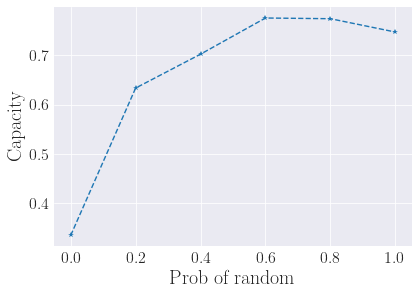

In [4]:
# Plot
plt.plot(random_df.index.values,
         random_df['capacity'], '--*', label='NML')
plt.ylabel('Capacity')
plt.xlabel('Prob of random')
plt.title('Capacity Vs. Prob to be Random') if is_plot_title else None
# plt.savefig(os.path.join(output_path, 'figure_mixture_random_prob_capacity.jpg'),
#             dpi=200, bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

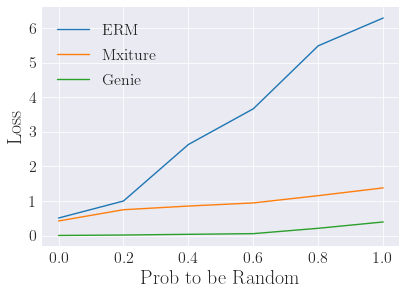

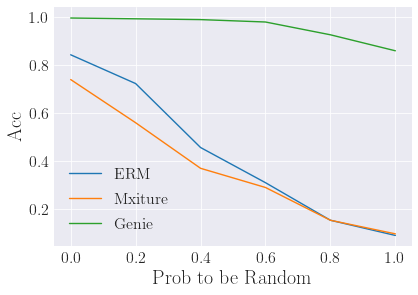

In [5]:
# Check noisy data
plt.plot(random_df.index.values, random_df['erm_mean_loss'], label='ERM')
plt.plot(random_df.index.values, random_df['mixture_mean_loss'], label='Mxiture')
plt.plot(random_df.index.values, random_df['genie_mean_loss'], label='Genie')
plt.title('Loss of random labels') if is_plot_title else None
plt.ylabel('Loss')
plt.xlabel('Prob to be Random')
plt.legend()
# plt.savefig(os.path.join(output_path, 'figure_random_prob_loss.pdf'), dpi=300,
#             bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

plt.plot(random_df.index.values, random_df['erm_acc'], label='ERM')
plt.plot(random_df.index.values, random_df['mixture_acc'], label='Mxiture')
plt.plot(random_df.index.values, random_df['genie_acc'], label='Genie')
plt.title('Acc of random labels') if is_plot_title else None
plt.ylabel('Acc')
plt.xlabel('Prob to be Random')
plt.legend()
# plt.savefig(os.path.join(output_path, 'figure_random_prob_acc.pdf'), dpi=300,
#             bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

# Capacity Historams

0.0
0.2
Random Prob = 0.2, num=300


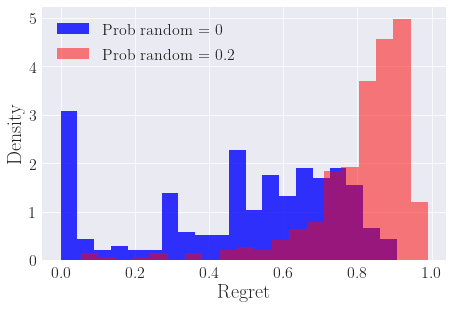

0.4
Random Prob = 0.4, num=300


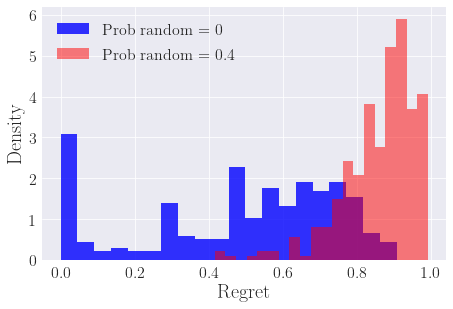

0.6
Random Prob = 0.6, num=300


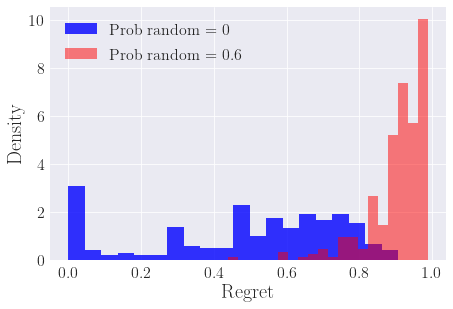

0.8
Random Prob = 0.8, num=300


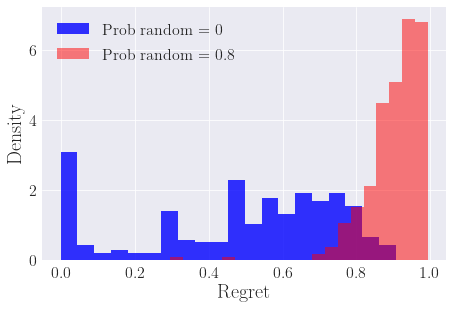

1.0
Random Prob = 1.0, num=300


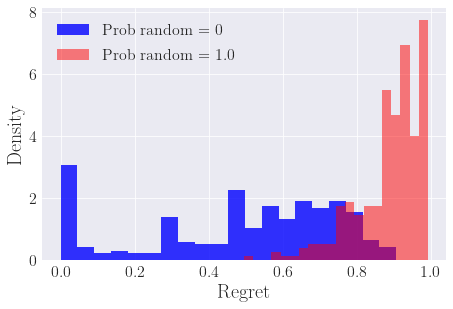

In [6]:
bins = 20
result_prob_0_df, _ = load_results_to_df(files_random[0])
for (rand_prob_single, file_random) in zip(random_prob, files_random):
    print(rand_prob_single)
    if float(rand_prob_single) == 0:
        continue
    results_df, _ = load_results_to_df(file_random)
    print('Random Prob = {}, num={}'.format(
        rand_prob_single, results_df.shape[0]))

    plt.hist(result_prob_0_df['log10_norm_factor'], alpha=0.8, bins=bins,
             density=True, color='blue', label='Prob random = 0')
    plt.hist(results_df['log10_norm_factor'], alpha=0.5, bins=bins,
             density=True, color='red',  label='Prob random = {}'.format(rand_prob_single))
    plt.xlabel('Regret')
    plt.ylabel('Density')
    plt.legend()
    plt.savefig(os.path.join(output_path, 'figure_mixture_random_prob_{}_capacity_hist.pdf'.format(int(10*rand_prob_single))), dpi=300,
                bbox_inches=plt.tight_layout()) if is_save_fig else None
    plt.show()

## Detection
Capacity based detection of random labels in the trainset.

In [7]:
from numpy import inf
ind_df = all_df_dict['0.0']['all']
ind_mixture_df = all_df_dict['0.0']['mixture']
total_subplots = 2

only_lrt_metric = {}

zip_list = zip(all_df_dict.keys(), [rand_prob_dict['all'] for _, rand_prob_dict in all_df_dict.items()],
               [rand_prob_dict['mixture'] for _, rand_prob_dict in all_df_dict.items()])
for (ooo_dataset, ood_df, ood_mixture_df) in zip_list:
    upsample_ratio = int(ind_df.shape[0] / ood_df.shape[0])
    print('Upsample ratio: ', upsample_ratio)

    # Baseline Max prob of ERM
    y_score_ind = ind_df[['erm_' + str(x) for x in range(10)]].max(axis=1).tolist() + \
        ood_df[['erm_' + str(x) for x in range(10)]].max(axis=1).tolist()
    y_true_ind = [True] * ind_df.shape[0] + [False] * ood_df.shape[0]
    ood_df_erm_baseline = calc_performance_in_out_dist(y_true_ind, y_score_ind)
    ood_df_erm_baseline = ood_df_erm_baseline.rename(index={0: 'Max Prob'})

    # Baseline p1/p2 of ERM
    p1_ind = np.sort(ind_df[['erm_' + str(x)
                             for x in range(10)]])[:, -2:][:, 1]
    p2_ind = np.sort(ind_df[['erm_' + str(x)
                             for x in range(10)]])[:, -2:][:, 0]
    p1_p2_ind = 1-p2_ind/p1_ind  # np.clip(p1_ind/p2_ind, 0, 10**6)
    p1_ood = np.sort(ood_df[['erm_' + str(x)
                             for x in range(10)]])[:, -2:][:, 1]
    p2_ood = np.sort(ood_df[['erm_' + str(x)
                             for x in range(10)]])[:, -2:][:, 0]
    p1_p2_ood = 1-p2_ood/p1_ood  # np.clip(p1_ood/p2_ood, 0, 10**6)

    y_score_ind = list(p1_p2_ind) + list(p1_p2_ood)
    y_true_ind = [True] * ind_df.shape[0] + [False] * ood_df.shape[0]
    ood_df_erm_baseline_2 = calc_performance_in_out_dist(
        y_true_ind, y_score_ind)
    ood_df_erm_baseline_2 = ood_df_erm_baseline_2.rename(index={0: '1-p2/p1'})

    # Entropy
    y_score_ind = (1.0 - ind_df['erm_entropy']).tolist() + \
        (1.0 - ood_df['erm_entropy']).tolist()
    y_true_ind = [True] * ind_df.shape[0] + [False] * ood_df.shape[0]
    ood_df_erm_baseline_3 = calc_performance_in_out_dist(
        y_true_ind, y_score_ind)
    ood_df_erm_baseline_3 = ood_df_erm_baseline_3.rename(
        index={0: '1 - Entropy'})

    # Capacity based
    y_score_ind = ind_mixture_df['capacity'].tolist() + \
        ood_mixture_df['capacity'].tolist()
    y_true_ind = [True] * ind_df.shape[0] + [False] * ood_df.shape[0]

    ood_df_ours = calc_performance_in_out_dist(y_true_ind, y_score_ind)
    ood_df_ours = ood_df_ours.rename(index={0: 'Capacity'})

    # Summary
    merged_pd = pd.concat(
        [ood_df_erm_baseline,
         ood_df_erm_baseline_2,
         ood_df_erm_baseline_3,
         ood_df_ours])
    print('%s:' % ooo_dataset)
    print(merged_pd.round(3))
    print()

    only_lrt_metric[ooo_dataset] = merged_pd['KL in P_lamb']


Upsample ratio:  1
0.0:
             KL Divergence  Bhattach Distance  KL in P_lamb
Max Prob               0.0               -0.0          -0.0
1-p2/p1                0.0               -0.0          -0.0
1 - Entropy            0.0               -0.0          -0.0
Capacity               0.0               -0.0           0.0

Upsample ratio:  1
0.2:
             KL Divergence  Bhattach Distance  KL in P_lamb
Max Prob             0.365              0.035         0.035
1-p2/p1              0.551              0.035         0.039
1 - Entropy          0.464              0.037         0.040
Capacity             1.035              0.153         0.156

Upsample ratio:  1
0.4:
             KL Divergence  Bhattach Distance  KL in P_lamb
Max Prob             0.364              0.044         0.046
1-p2/p1              1.008              0.050         0.055
1 - Entropy          1.039              0.066         0.074
Capacity             0.474              0.111         0.114

Upsample ratio:  1
0.6:
 

## Summary of detection methods

In [8]:
pd.DataFrame(only_lrt_metric).drop(columns='0.0').round(3)

,0.2,0.4,0.6,0.8,1.0
Max Prob,0.035,0.046,0.104,0.103,0.098
1-p2/p1,0.039,0.055,0.140,0.155,0.126
1 - Entropy,0.040,0.074,0.166,0.118,0.164
Capacity,0.156,0.114,0.372,0.430,0.211
